In [ ]:
!pip install git+https://github.com/huggingface/transformers

  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-vb99np3t
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-vb99np3t
  Resolved https://github.com/huggingface/transformers to commit 78b2929c0554b79e0489b451ce4ece14d265ead2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.45.0.dev0-py3-none-any.whl size=9786808 sha256=826d07bbc46b302260676d496584adba7adbec4329e5d5e5b366877771d3968d
  Stored in directory: /tmp/pip-ephem-wheel-cache-5y6rf918/wheels/c0/14/d6/6c9a5582d2ac191ec0a483be151a4495fe1eb2a6706ca49f1b
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.44.2
    Uninstalling transformers-4.44.2:
      Successfully uninstalled transformers-4.44.2


In [ ]:
!pip install qwen-vl-utils -q



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.0/33.0 MB 25.2 MB/s eta 0:00:00


import json

with open('/content/annotation.json', 'r') as file:
    data = json.load(file)

print(data)


import json

with open('/content/images.json', 'r') as file:
    data = json.load(file)

print(data)


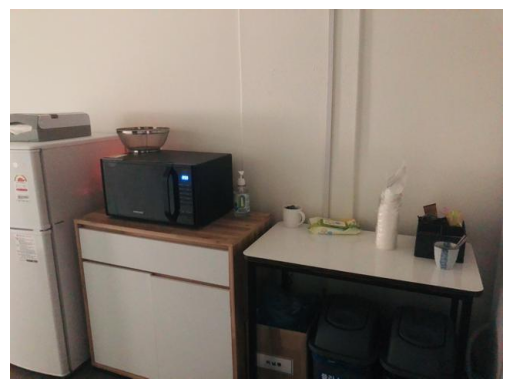

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# 이미지 파일 경로
image_path = '/content/NIA_dataset03_000000001519.jpg'

# 이미지 열기
image = Image.open(image_path)

# 이미지 보여주기
plt.imshow(image)
plt.axis('off')  # 축 숨기기
plt.show()


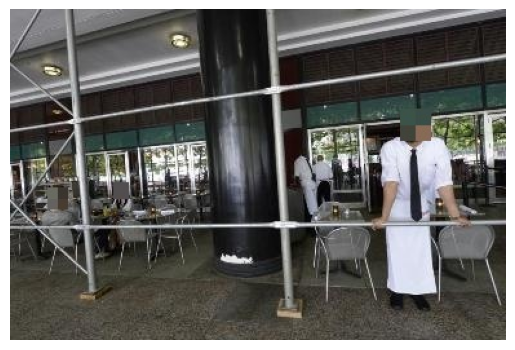

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# 이미지 파일 경로
image_path = '/content/NIA_dataset02_000000050043.jpg'

# 이미지 열기
image = Image.open(image_path)

# 이미지 보여주기
plt.imshow(image)
plt.axis('off')  # 축 숨기기
plt.show()


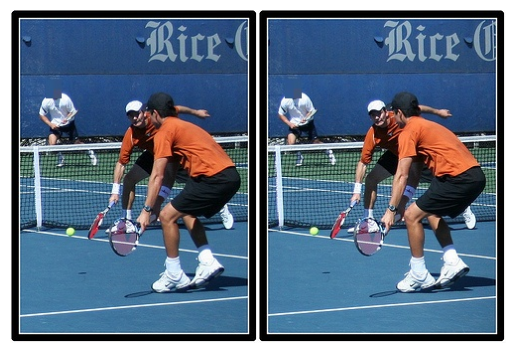

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# 이미지 파일 경로
image_path = '/content/NIA_dataset02_000000050042.jpg'

# 이미지 열기
image = Image.open(image_path)

# 이미지 보여주기
plt.imshow(image)
plt.axis('off')  # 축 숨기기
plt.show()


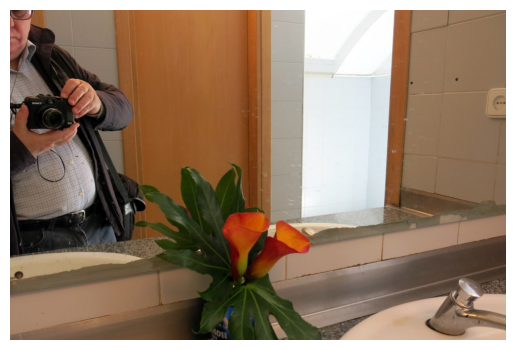

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# 이미지 파일 경로
image_path = '/content/NIA_dataset02_000000050009.jpg'

# 이미지 열기
image = Image.open(image_path)

# 이미지 보여주기
plt.imshow(image)
plt.axis('off')  # 축 숨기기
plt.show()


In [ ]:
messages = [
    {
        "role": "user",
        "content": [
            {"type": "image", "image": "file:///path/to/your/image.jpg"},
            {"type": "text", "text": "Describe this image."},
        ],
    }
]
## Image URL
messages = [
    {
        "role": "user",
        "content": [
            {"type": "image", "image": "http://path/to/your/image.jpg"},
            {"type": "text", "text": "이미지에 대해 설명해줘"},
        ],
    }
]
## Base64 encoded image
messages = [
    {
        "role": "user",
        "content": [
            {"type": "image", "image": "/content/NIA_dataset03_000000001519.jpg"},
            {"type": "text", "text": "이미지에 대해 설명해줘"},
        ],
    }
]

In [ ]:
messages1 = [
    {
        "role": "user",
        "content": [
            {"type": "image", "image": "/content/NIA_dataset02_000000050042.jpg"},
            {"type": "text", "text": "이미지에 대해 설명해줘"},
        ],
    }
]

In [ ]:
messages2 = [
    {
        "role": "user",
        "content": [
            {"type": "image", "image": "/content/NIA_dataset02_000000050009.jpg"},
            {"type": "text", "text": "이미지에 대해 설명해줘"},
        ],
    }
]

In [ ]:

messages3 = [
    {
        "role": "user",
        "content": [
            {"type": "image", "image": "/content/NIA_dataset02_000000050043.jpg"},
            {"type": "text", "text": "이미지에 대해 설명해줘"},
        ],
    }
]

In [ ]:
from transformers import Qwen2VLForConditionalGeneration, AutoTokenizer, AutoProcessor
from qwen_vl_utils import process_vision_info

# default: Load the model on the available device(s)
model = Qwen2VLForConditionalGeneration.from_pretrained(
    "Qwen/Qwen2-VL-7B-Instruct", torch_dtype="auto", device_map="auto"
)

# We recommend enabling flash_attention_2 for better acceleration and memory saving, especially in multi-image and video scenarios.
# model = Qwen2VLForConditionalGeneration.from_pretrained(
#     "Qwen/Qwen2-VL-7B-Instruct",
#     torch_dtype=torch.bfloat16,
#     attn_implementation="flash_attention_2",
#     device_map="auto",
# )

# default processer
processor = AutoProcessor.from_pretrained("Qwen/Qwen2-VL-7B-Instruct")

# The default range for the number of visual tokens per image in the model is 4-16384. You can set min_pixels and max_pixels according to your needs, such as a token count range of 256-1280, to balance speed and memory usage.
# min_pixels = 256*28*28
# max_pixels = 1280*28*28
# processor = AutoProcessor.from_pretrained("Qwen/Qwen2-VL-7B-Instruct", min_pixels=min_pixels, max_pixels=max_pixels)

# messages = [
# #     {
# #         "role": "user",
# #         "content": [
# #             {
# #                 "type": "image",
# #                 "image": "https://qianwen-res.oss-cn-beijing.aliyuncs.com/Qwen-VL/assets/demo.jpeg",
# #             },
# #             {"type": "text", "text": "Describe this image."},
# #         ],
# #     }
# # ]



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

Unrecognized keys in `rope_scaling` for 'rope_type'='default': {'mrope_section'}


model.safetensors.index.json:   0%|          | 0.00/56.5k [00:00<?, ?B/s]

model-00001-of-00005.safetensors:   0%|          | 0.00/3.90G [00:00<?, ?B/s]

model-00002-of-00005.safetensors:   0%|          | 0.00/3.86G [00:00<?, ?B/s]

model-00003-of-00005.safetensors:   0%|          | 0.00/3.86G [00:00<?, ?B/s]

model-00004-of-00005.safetensors:   0%|          | 0.00/3.86G [00:00<?, ?B/s]

model-00005-of-00005.safetensors:   0%|          | 0.00/1.09G [00:00<?, ?B/s]

`Qwen2VLRotaryEmbedding` can now be fully parameterized by passing the model config through the `config` argument. All other arguments will be removed in v4.46


Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/244 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/347 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

In [ ]:

# Preparation for inference
text = processor.apply_chat_template(
    messages, tokenize=False, add_generation_prompt=True
)
image_inputs, video_inputs = process_vision_info(messages)
inputs = processor(
    text=[text],
    images=image_inputs,
    videos=video_inputs,
    padding=True,
    return_tensors="pt",
)
inputs = inputs.to("cuda")

# Inference: Generation of the output
generated_ids = model.generate(**inputs, max_new_tokens=128)
generated_ids_trimmed = [
    out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
]
output_text = processor.batch_decode(
    generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
)
print(output_text)

['이 이미지에는 주로 주방이나 작은 업무 공간의 모습을 보여줍니다. \n\n- 왼쪽에는 냉장고가 있고, 그 위에 라디오가 놓여져 있습니다.\n- 라디오 위에는 냉장고 위에 놓여져 있는 라디오가 있습니다.\n- 라디오 위에는 냉장고 위에 놓여져 있는 라디오가 있습니다.\n- 라디오 위에는 냉장고 위에 놓여져 있는 라디']


In [ ]:

# Preparation for inference
text = processor.apply_chat_template(
    messages1, tokenize=False, add_generation_prompt=True
)
image_inputs, video_inputs = process_vision_info(messages1)
inputs = processor(
    text=[text],
    images=image_inputs,
    videos=video_inputs,
    padding=True,
    return_tensors="pt",
)
inputs = inputs.to("cuda")

# Inference: Generation of the output
generated_ids = model.generate(**inputs, max_new_tokens=128)
generated_ids_trimmed = [
    out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
]
output_text = processor.batch_decode(
    generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
)
print(output_text)

['이 이미지는 두 개의 동일한 사진을 보여줍니다. 두 사진 모두 테니스 코트에서 두 명의 선수가 있는 장면을 보여줍니다. 선수들은 모두 오렌지색의 티셔츠와 검은색의 반바지를 입고 있으며, 그 중 한 명은 라켓을 들고 있습니다. 코트는 파란색이며, 배경에는 "Rice"라는 글자가 적혀 있습니다. 코트 위에는 테니스 네트가 설치되어 있으며, 코트 위에 떨']


In [33]:

# Preparation for inference
text = processor.apply_chat_template(
    messages3, tokenize=False, add_generation_prompt=True
)
image_inputs, video_inputs = process_vision_info(messages2)
inputs = processor(
    text=[text],
    images=image_inputs,
    videos=video_inputs,
    padding=True,
    return_tensors="pt",
)
inputs = inputs.to("cuda")

# Inference: Generation of the output
generated_ids = model.generate(**inputs, max_new_tokens=128)
generated_ids_trimmed = [
    out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
]
output_text = processor.batch_decode(
    generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
)
print(output_text)

OutOfMemoryError: CUDA out of memory. Tried to allocate 16.00 MiB. GPU 0 has a total capacity of 14.75 GiB of which 11.06 MiB is free. Process 16854 has 14.73 GiB memory in use. Of the allocated memory 14.40 GiB is allocated by PyTorch, and 214.25 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
!pip install Pillow==10.1.0 torch==2.1.2 torchvision==0.16.2 transformers==4.40.0 sentencepiece==0.1.99 mdecord


In [20]:
# test.py Minicpm v
import torch
from PIL import Image
from transformers import AutoModel, AutoTokenizer

model1 = AutoModel.from_pretrained('openbmb/MiniCPM-V-2_6', trust_remote_code=True,
    attn_implementation='sdpa', torch_dtype=torch.bfloat16) # sdpa or flash_attention_2, no eager
model1 = model1.eval().cuda()
tokenizer = AutoTokenizer.from_pretrained('openbmb/MiniCPM-V-2_6', trust_remote_code=True)

image = Image.open('xx.jpg').convert('RGB')
question = '사진에 대해 설명해주세요'
msgs = [{'role': 'user', 'content': [image, question]}]

res = model1.chat(
    image=None,
    msgs=msgs,
    tokenizer=tokenizer
)
print(res)

## if you want to use streaming, please make sure sampling=True and stream=True
## the model1.chat will return a generator
res = model1.chat(
    image=None,
    msgs=msgs,
    tokenizer=tokenizer,
    sampling=True,
    stream=True
)

generated_text = ""
for new_text in res:
    generated_text += new_text
    print(new_text, flush=True, end='')


model-00001-of-00004.safetensors:  36%|###5      | 1.74G/4.87G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/4.93G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.33G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/2.06G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/121 [00:00<?, ?B/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 130.00 MiB. GPU 0 has a total capacity of 14.75 GiB of which 111.06 MiB is free. Process 16854 has 14.64 GiB memory in use. Of the allocated memory 14.25 GiB is allocated by PyTorch, and 265.20 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [21]:
#float32 paligemma 3b 테스트
from transformers import AutoProcessor, PaliGemmaForConditionalGeneration
from PIL import Image
import requests
import torch

model_id = "google/paligemma-3b-mix-224"

url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/car.jpg?download=true"
image = Image.open(requests.get(url, stream=True).raw)

model = PaliGemmaForConditionalGeneration.from_pretrained(model_id).eval()
processor = AutoProcessor.from_pretrained(model_id)

# Instruct the model to create a caption in Spanish
prompt = "사진에 대해 설명해주세요"
model_inputs = processor(text=prompt, images=image, return_tensors="pt")
input_len = model_inputs["input_ids"].shape[-1]MB

with torch.inference_mode():
    generation = model.generate(**model_inputs, max_new_tokens=100, do_sample=False)
    generation = generation[0][input_len:]
    decoded = processor.decode(generation, skip_special_tokens=True)
    print(decoded)

OSError: You are trying to access a gated repo.
Make sure to have access to it at https://huggingface.co/google/paligemma-3b-mix-224.
401 Client Error. (Request ID: Root=1-66f03b70-41f66bf6670772b70e21367e;add24766-f508-42a6-b3c0-36b9af469166)

Cannot access gated repo for url https://huggingface.co/google/paligemma-3b-mix-224/resolve/main/config.json.
Access to model google/paligemma-3b-mix-224 is restricted. You must have access to it and be authenticated to access it. Please log in.

In [23]:
from transformers import AutoProcessor, PaliGemmaForConditionalGeneration
from PIL import Image
import requests
import torch

model_id = "google/paligemma-3b-mix-224"

url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/car.jpg?download=true"
image = Image.open(requests.get(url, stream=True).raw)

model = PaliGemmaForConditionalGeneration.from_pretrained(model_id).eval()
processor = AutoProcessor.from_pretrained(model_id)

# Instruct the model to create a caption in Spanish
prompt = "caption es"
model_inputs = processor(text=prompt, images=image, return_tensors="pt")
input_len = model_inputs["input_ids"].shape[-1]

with torch.inference_mode():
    generation = model.generate(**model_inputs, max_new_tokens=100, do_sample=False)
    generation = generation[0][input_len:]
    decoded = processor.decode(generation, skip_special_tokens=True)
    print(decoded)


OSError: You are trying to access a gated repo.
Make sure to have access to it at https://huggingface.co/google/paligemma-3b-mix-224.
401 Client Error. (Request ID: Root=1-66f03f36-6eba972719b28adc7834609a;e8783b95-7c16-48c2-82a1-a31754f28708)

Cannot access gated repo for url https://huggingface.co/google/paligemma-3b-mix-224/resolve/main/config.json.
Access to model google/paligemma-3b-mix-224 is restricted. You must have access to it and be authenticated to access it. Please log in.

In [24]:
#internlm 16float 테스트
!pip install transformers==4.37.2
import torch
from transformers import AutoTokenizer, AutoModel
path = "OpenGVLab/InternVL2-8B"
model = AutoModel.from_pretrained(
    path,
    torch_dtype=torch.bfloat16,
    low_cpu_mem_usage=True,
    use_flash_attn=True,
    trust_remote_code=True).eval().cuda()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 94.6 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.45.0.dev0
    Uninstalling transformers-4.45.0.dev0:
      Successfully uninstalled transformers-4.45.0.dev0


config.json:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

configuration_internvl_chat.py:   0%|          | 0.00/3.85k [00:00<?, ?B/s]

configuration_intern_vit.py:   0%|          | 0.00/5.55k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/OpenGVLab/InternVL2-8B:
- configuration_intern_vit.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


configuration_internlm2.py:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/OpenGVLab/InternVL2-8B:
- configuration_internlm2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/OpenGVLab/InternVL2-8B:
- configuration_internvl_chat.py
- configuration_intern_vit.py
- configuration_internlm2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_internvl_chat.py:   0%|          | 0.00/15.6k [00:00<?, ?B/s]

modeling_internlm2.py:   0%|          | 0.00/61.2k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/OpenGVLab/InternVL2-8B:
- modeling_internlm2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_intern_vit.py:   0%|          | 0.00/18.1k [00:00<?, ?B/s]

ImportError: This modeling file requires the following packages that were not found in your environment: timm. Run `pip install timm`

In [26]:
!pip install decord

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 67.4 MB/s eta 0:00:00


In [30]:
!pip install torchvision timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 20.9 MB/s eta 0:00:00


In [32]:
import numpy as np
import torch
import torchvision.transforms as T
from decord import VideoReader, cpu
from PIL import Image
from torchvision.transforms.functional import InterpolationMode
from transformers import AutoModel, AutoTokenizer

IMAGENET_MEAN = (0.485, 0.456, 0.406)
IMAGENET_STD = (0.229, 0.224, 0.225)

def build_transform(input_size):
    MEAN, STD = IMAGENET_MEAN, IMAGENET_STD
    transform = T.Compose([
        T.Lambda(lambda img: img.convert('RGB') if img.mode != 'RGB' else img),
        T.Resize((input_size, input_size), interpolation=InterpolationMode.BICUBIC),
        T.ToTensor(),
        T.Normalize(mean=MEAN, std=STD)
    ])
    return transform

def find_closest_aspect_ratio(aspect_ratio, target_ratios, width, height, image_size):
    best_ratio_diff = float('inf')
    best_ratio = (1, 1)
    area = width * height
    for ratio in target_ratios:
        target_aspect_ratio = ratio[0] / ratio[1]
        ratio_diff = abs(aspect_ratio - target_aspect_ratio)
        if ratio_diff < best_ratio_diff:
            best_ratio_diff = ratio_diff
            best_ratio = ratio
        elif ratio_diff == best_ratio_diff:
            if area > 0.5 * image_size * image_size * ratio[0] * ratio[1]:
                best_ratio = ratio
    return best_ratio

def dynamic_preprocess(image, min_num=1, max_num=12, image_size=448, use_thumbnail=False):
    orig_width, orig_height = image.size
    aspect_ratio = orig_width / orig_height

    # calculate the existing image aspect ratio
    target_ratios = set(
        (i, j) for n in range(min_num, max_num + 1) for i in range(1, n + 1) for j in range(1, n + 1) if
        i * j <= max_num and i * j >= min_num)
    target_ratios = sorted(target_ratios, key=lambda x: x[0] * x[1])

    # find the closest aspect ratio to the target
    target_aspect_ratio = find_closest_aspect_ratio(
        aspect_ratio, target_ratios, orig_width, orig_height, image_size)

    # calculate the target width and height
    target_width = image_size * target_aspect_ratio[0]
    target_height = image_size * target_aspect_ratio[1]
    blocks = target_aspect_ratio[0] * target_aspect_ratio[1]

    # resize the image
    resized_img = image.resize((target_width, target_height))
    processed_images = []
    for i in range(blocks):
        box = (
            (i % (target_width // image_size)) * image_size,
            (i // (target_width // image_size)) * image_size,
            ((i % (target_width // image_size)) + 1) * image_size,
            ((i // (target_width // image_size)) + 1) * image_size
        )
        # split the image
        split_img = resized_img.crop(box)
        processed_images.append(split_img)
    assert len(processed_images) == blocks
    if use_thumbnail and len(processed_images) != 1:
        thumbnail_img = image.resize((image_size, image_size))
        processed_images.append(thumbnail_img)
    return processed_images

def load_image(image_file, input_size=448, max_num=12):
    image = Image.open(image_file).convert('RGB')
    transform = build_transform(input_size=input_size)
    images = dynamic_preprocess(image, image_size=input_size, use_thumbnail=True, max_num=max_num)
    pixel_values = [transform(image) for image in images]
    pixel_values = torch.stack(pixel_values)
    return pixel_values

# If you want to load a model using multiple GPUs, please refer to the `Multiple GPUs` section.
path = 'OpenGVLab/InternVL2-8B'
model = AutoModel.from_pretrained(
    path,
    torch_dtype=torch.bfloat16,
    low_cpu_mem_usage=True,
    use_flash_attn=True,
    trust_remote_code=True).eval().cuda()
tokenizer = AutoTokenizer.from_pretrained(path, trust_remote_code=True, use_fast=False)

# set the max number of tiles in `max_num`
pixel_values = load_image('./content/NIA_dataset02_000000050009.jpg', max_num=12).to(torch.bfloat16).cuda()
generation_config = dict(max_new_tokens=1024, do_sample=True)

# # pure-text conversation (纯文本对话)
# question = 'Hello, who are you?'
# response, history = model.chat(tokenizer, None, question, generation_config, history=None, return_history=True)
# print(f'User: {question}\nAssistant: {response}')

# question = 'Can you tell me a story?'
# response, history = model.chat(tokenizer, None, question, generation_config, history=history, return_history=True)
# print(f'User: {question}\nAssistant: {response}')

# single-image single-round conversation (单图单轮对话)
question = '<image>\nPlease describe the image shortly.'
response = model.chat(tokenizer, pixel_values, question, generation_config)
print(f'User: {question}\nAssistant: {response}')

# # single-image multi-round conversation (单图多轮对话)
# question = '<image>\nPlease describe the image in detail.'
# response, history = model.chat(tokenizer, pixel_values, question, generation_config, history=None, return_history=True)
# print(f'User: {question}\nAssistant: {response}')

# question = 'Please write a poem according to the image.'
# response, history = model.chat(tokenizer, pixel_values, question, generation_config, history=history, return_history=True)
# print(f'User: {question}\nAssistant: {response}')

# # multi-image multi-round conversation, combined images (多图多轮对话，拼接图像)
# pixel_values1 = load_image('./examples/image1.jpg', max_num=12).to(torch.bfloat16).cuda()
# pixel_values2 = load_image('./examples/image2.jpg', max_num=12).to(torch.bfloat16).cuda()
# pixel_values = torch.cat((pixel_values1, pixel_values2), dim=0)

# question = '<image>\nDescribe the two images in detail.'
# response, history = model.chat(tokenizer, pixel_values, question, generation_config,
#                                history=None, return_history=True)
# print(f'User: {question}\nAssistant: {response}')

# question = 'What are the similarities and differences between these two images.'
# response, history = model.chat(tokenizer, pixel_values, question, generation_config,
#                                history=history, return_history=True)
# print(f'User: {question}\nAssistant: {response}')

# # multi-image multi-round conversation, separate images (多图多轮对话，独立图像)
# pixel_values1 = load_image('./examples/image1.jpg', max_num=12).to(torch.bfloat16).cuda()
# pixel_values2 = load_image('./examples/image2.jpg', max_num=12).to(torch.bfloat16).cuda()
# pixel_values = torch.cat((pixel_values1, pixel_values2), dim=0)
# num_patches_list = [pixel_values1.size(0), pixel_values2.size(0)]

# question = 'Image-1: <image>\nImage-2: <image>\nDescribe the two images in detail.'
# response, history = model.chat(tokenizer, pixel_values, question, generation_config,
#                                num_patches_list=num_patches_list,
#                                history=None, return_history=True)
# print(f'User: {question}\nAssistant: {response}')

# question = 'What are the similarities and differences between these two images.'
# response, history = model.chat(tokenizer, pixel_values, question, generation_config,
#                                num_patches_list=num_patches_list,
#                                history=history, return_history=True)
# print(f'User: {question}\nAssistant: {response}')

# # batch inference, single image per sample (单图批处理)
# pixel_values1 = load_image('./examples/image1.jpg', max_num=12).to(torch.bfloat16).cuda()
# pixel_values2 = load_image('./examples/image2.jpg', max_num=12).to(torch.bfloat16).cuda()
# num_patches_list = [pixel_values1.size(0), pixel_values2.size(0)]
# pixel_values = torch.cat((pixel_values1, pixel_values2), dim=0)

# questions = ['<image>\nDescribe the image in detail.'] * len(num_patches_list)
# responses = model.batch_chat(tokenizer, pixel_values,
#                              num_patches_list=num_patches_list,
#                              questions=questions,
#                              generation_config=generation_config)
# for question, response in zip(questions, responses):
#     print(f'User: {question}\nAssistant: {response}')

# video multi-round conversation (视频多轮对话)
def get_index(bound, fps, max_frame, first_idx=0, num_segments=32):
    if bound:
        start, end = bound[0], bound[1]
    else:
        start, end = -100000, 100000
    start_idx = max(first_idx, round(start * fps))
    end_idx = min(round(end * fps), max_frame)
    seg_size = float(end_idx - start_idx) / num_segments
    frame_indices = np.array([
        int(start_idx + (seg_size / 2) + np.round(seg_size * idx))
        for idx in range(num_segments)
    ])
    return frame_indices

def load_video(video_path, bound=None, input_size=448, max_num=1, num_segments=32):
    vr = VideoReader(video_path, ctx=cpu(0), num_threads=1)
    max_frame = len(vr) - 1
    fps = float(vr.get_avg_fps())

    pixel_values_list, num_patches_list = [], []
    transform = build_transform(input_size=input_size)
    frame_indices = get_index(bound, fps, max_frame, first_idx=0, num_segments=num_segments)
    for frame_index in frame_indices:
        img = Image.fromarray(vr[frame_index].asnumpy()).convert('RGB')
        img = dynamic_preprocess(img, image_size=input_size, use_thumbnail=True, max_num=max_num)
        pixel_values = [transform(tile) for tile in img]
        pixel_values = torch.stack(pixel_values)
        num_patches_list.append(pixel_values.shape[0])
        pixel_values_list.append(pixel_values)
    pixel_values = torch.cat(pixel_values_list)
    return pixel_values, num_patches_list

# video_path = './examples/red-panda.mp4'
# pixel_values, num_patches_list = load_video(video_path, num_segments=8, max_num=1)
# pixel_values = pixel_values.to(torch.bfloat16).cuda()
# video_prefix = ''.join([f'Frame{i+1}: <image>\n' for i in range(len(num_patches_list))])
# question = video_prefix + 'What is the red panda doing?'
# # Frame1: <image>\nFrame2: <image>\n...\nFrame8: <image>\n{question}
# response, history = model.chat(tokenizer, pixel_values, question, generation_config,
#                                num_patches_list=num_patches_list, history=None, return_history=True)
# print(f'User: {question}\nAssistant: {response}')

# question = 'Describe this video in detail. Don\'t repeat.'
# response, history = model.chat(tokenizer, pixel_values, question, generation_config,
#                                num_patches_list=num_patches_list, history=history, return_history=True)
# print(f'User: {question}\nAssistant: {response}')


model-00001-of-00004.safetensors:  15%|#5        | 744M/4.94G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.38G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/115 [00:00<?, ?B/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 14.75 GiB of which 11.06 MiB is free. Process 16854 has 14.73 GiB memory in use. Of the allocated memory 14.40 GiB is allocated by PyTorch, and 214.27 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)